In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [12]:
adelaide_df = pd.read_csv('Data_sets/Perth_Data.csv')

adelaide_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

adelaide_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,307.699347,263.070612,310.030123,280.013796,271.573227,271.823645,271.624806,265.369786,300.027841,265.177959,...,87172.608685,87227.504851,87479.666124,87259.717304,86416.344782,86879.880051,86110.006386,88026.099911,87450.222314,1.394474e+06
std,186.407136,182.581205,188.617119,180.756415,183.358872,181.908406,180.590296,182.812626,179.270315,183.327602,...,10574.714409,10196.668231,10087.897047,10470.723965,10574.225552,9942.141893,10371.876481,10471.574508,10477.575900,5.224964e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46239.804500,50114.929100,47183.047800,49291.778000,49549.990600,49465.685600,47027.625800,48982.438200,46881.573700,1.177711e+06
25%,132.551750,97.074000,126.133550,117.152850,98.514700,102.462550,105.551400,94.713600,134.877500,101.783700,...,79380.334100,79774.810650,79824.903400,79398.645350,78207.234750,80018.621350,78324.298250,80115.162800,79372.887300,1.359069e+06
50%,343.866000,243.848700,347.420000,282.059100,265.251300,267.371400,261.311300,251.314100,316.861100,253.391800,...,88612.820700,88460.903900,88767.991600,88451.697000,87220.716100,87720.523300,86479.413300,90513.480700,89574.098300,1.388877e+06
75%,477.287200,427.381950,480.394400,440.355200,441.643150,435.246350,436.595450,441.454600,461.048700,435.321450,...,96919.687700,96704.534750,96880.955100,96922.406900,96700.561650,96550.212600,96575.218750,97074.449000,96752.117600,1.426946e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,107228.154900,105509.436700,104693.116900,104978.220800,103852.565800,104757.583200,104435.890300,105785.806400,104430.644700,1.565836e+06


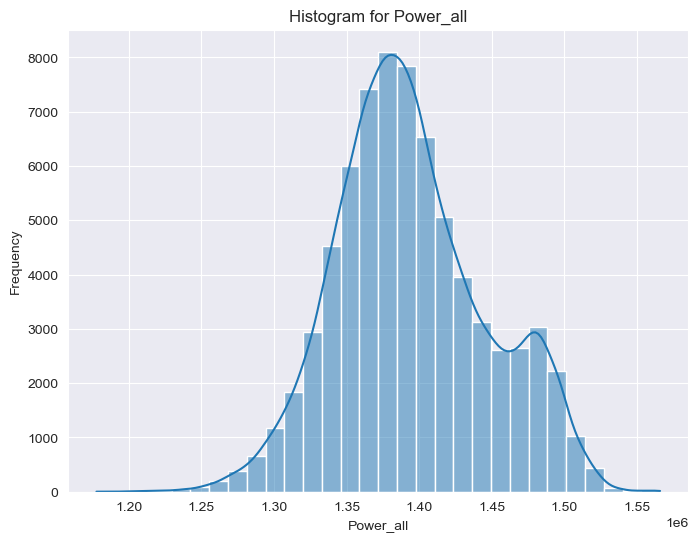

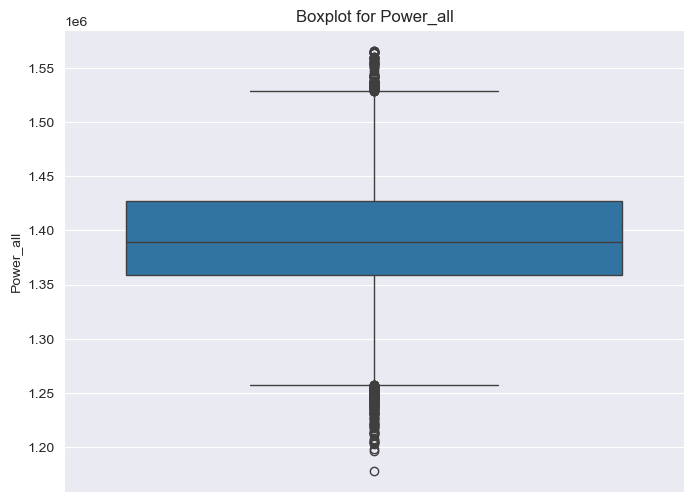

In [13]:
# Histogram dla kolumny Power_all
# sydney_df['Power_all'] = np.log(sydney_df['Power_all'] - sydney_df['Power_all'].min() + 1)

plt.figure(figsize=(8, 6))
sns.histplot(adelaide_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=adelaide_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()


In [14]:
upper_limit = adelaide_df['Power_all'].mean() + 3 * adelaide_df['Power_all'].std()
lower_limit = adelaide_df['Power_all'].mean() - 3 * adelaide_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = adelaide_df.loc[(adelaide_df['Power_all'] < upper_limit) & (adelaide_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(adelaide_df))

adelaide_df = final_df_new


1551222.605475811
1237724.7497664012
Liczba wierszy po filtracji: 71912
Oryginalna liczba wierszy: 71999


In [15]:
adelaide_df= adelaide_df.dropna()
adelaide_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
71994    False
71995    False
71996    False
71997    False
71998    False
Length: 71912, dtype: bool

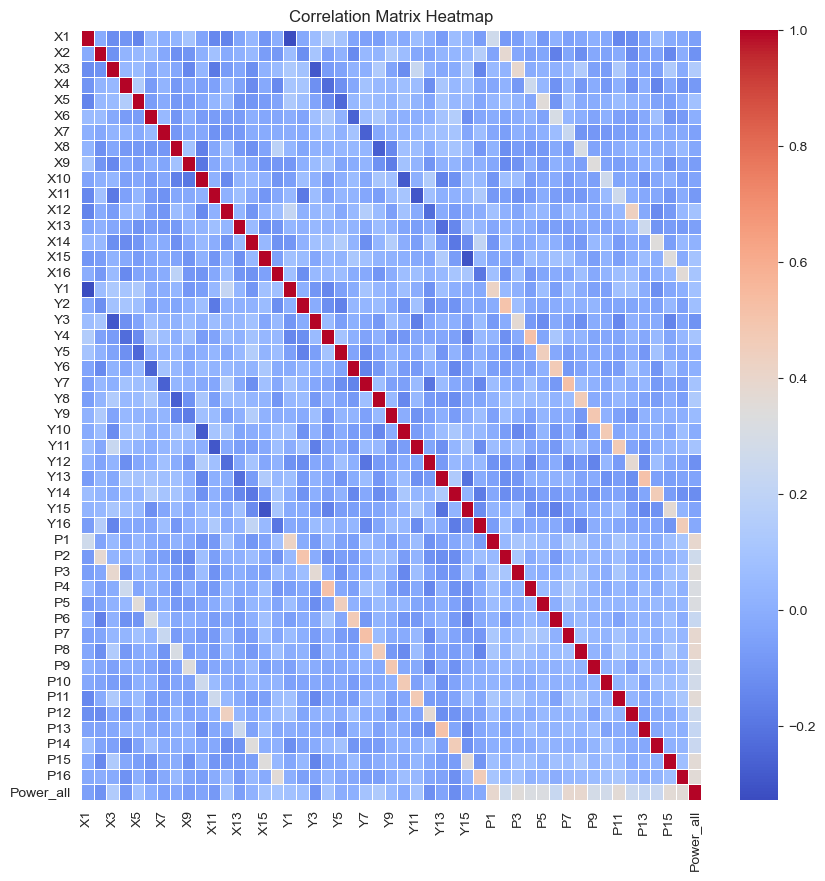

In [16]:
correlation_matrix = adelaide_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [17]:
# Przygotowanie cech (X) i etykiety (y)
X = adelaide_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = adelaide_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 50338 samples
Validation set: 10787 samples
Test set: 10787 samples


In [18]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse_lr, rmse_lr = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 2320806574.8596044, RMSE: 48174.750387102205, R²: 0.13577600382841748


In [19]:

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.11,
    max_depth=10,
    random_state=42,
    eval_metric="rmse"  # Tutaj definiujemy metrykę
)

# Trenowanie modelu z zestawem walidacyjnym
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  
    verbose=True  # Wyświetlanie postępu
)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Obliczanie MSE, RMSE i R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {mse}, RMSE: {rmse}, R²: {r2}")


[0]	validation_0-rmse:48447.81898	validation_1-rmse:48323.48251
[1]	validation_0-rmse:45262.11813	validation_1-rmse:45325.79351
[2]	validation_0-rmse:42486.78548	validation_1-rmse:42767.46548
[3]	validation_0-rmse:39997.42955	validation_1-rmse:40505.19167
[4]	validation_0-rmse:37706.44780	validation_1-rmse:38456.91371
[5]	validation_0-rmse:35697.62138	validation_1-rmse:36686.47297
[6]	validation_0-rmse:33825.05190	validation_1-rmse:35070.50121
[7]	validation_0-rmse:32224.19485	validation_1-rmse:33729.00975
[8]	validation_0-rmse:30848.02766	validation_1-rmse:32591.80313
[9]	validation_0-rmse:29496.39944	validation_1-rmse:31480.20735
[10]	validation_0-rmse:28364.51385	validation_1-rmse:30569.29495
[11]	validation_0-rmse:27311.27702	validation_1-rmse:29767.10887
[12]	validation_0-rmse:26347.25618	validation_1-rmse:29077.57110
[13]	validation_0-rmse:25534.78049	validation_1-rmse:28493.51420
[14]	validation_0-rmse:24742.84290	validation_1-rmse:27960.51671
[15]	validation_0-rmse:24161.92106	

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],       # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],             # Zmniejszono do dwóch wartości
    'learning_rate': [0.1,0.2]     # Zmniejszono do dwóch wartości
}


# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=2,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"Gradient Boosting - MSE: {mse}, RMSE: {rmse}, R^2: {r2}")


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - MSE: 390843132.5258998, RMSE: 19769.752970785947, R^2: 0.854457490112813
